# Setup


In [13]:
import ctypes
import numpy as np
from picosdk.ps4000 import ps4000 as ps
import matplotlib.pyplot as plt
from picosdk.functions import adc2mV, assert_pico_ok
from time import sleep
import csv
import h5py
from scipy.signal import welch, correlate, correlation_lags
from numpy.fft import fft,ifft,fftshift
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal.windows import blackman

#plt.style.use('./nikhils_plot_style.mplstyle')

chandle = ctypes.c_int16()
status = {}
# Open PicoScope 4000 Series device
# Returns handle to chandle for use in future API functions



# Dual Channel Acquisition

## Setup


In [14]:
# Open 4000 series PicoScope
# Returns handle to chandle for use in future API functions
status["openunit"] = ps.ps4000OpenUnit(ctypes.byref(chandle))
assert_pico_ok(status["openunit"])

volt_scale=5

# Set up channel A
# handle = chandle
# channel = PS4000_CHANNEL_A = 0
# enabled = 1
# coupling type = PS4000_DC = 0
# range = PS4000_50mV = 2
# range = PS4000_200mV = 4
# range = PS4000_1000mV = 6
chARange = volt_scale
status["setChA"] = ps.ps4000SetChannel(chandle, 0, 1, 1, chARange)
assert_pico_ok(status["setChA"])

# Set up channel B
# handle = chandle
# channel = PS4000_CHANNEL_B = 1
# enabled = 1
# coupling type = PS4000_DC = 0
# range = PS4000_50mV = 2
chBRange = volt_scale
status["setChB"] = ps.ps4000SetChannel(chandle, 1, 1, 1, chBRange)
assert_pico_ok(status["setChB"])

# Only for single acquisition
# Set up single trigger
# handle = chandle
# enabled = 1
# source = PS4000_CHANNEL_A = 0
# threshold = 1024 ADC counts
# direction = PS4000_RISING = 2
# delay = 0 s
# auto Trigger = 1000 ms

status["trigger"] = ps.ps4000SetSimpleTrigger(chandle, 1, 0, 1024, 2, 0, 1000)
assert_pico_ok(status["trigger"])
#number of segments in Rapid block mode = 10
#no of bins
n_Bin=10

preTriggerSamples = 5000*n_Bin  ###splitting into n bins later
postTriggerSamples = 5000*n_Bin  ###splitting into n bins later
maxSamples = preTriggerSamples + postTriggerSamples



#Note: Trigger only applies to SINGLE channel acquisitions.
timebase = 4
timeIntervalns = ctypes.c_float()
returnedMaxSamples = ctypes.c_int32()
oversample = ctypes.c_int16(1)
status["getTimebase2"] = ps.ps4000GetTimebase2(chandle, timebase, maxSamples, ctypes.byref(timeIntervalns), oversample, ctypes.byref(returnedMaxSamples), 0)
assert_pico_ok(status["getTimebase2"])

# Run block capture
# handle = chandle
# number of pre-trigger samples = preTriggerSamples
# number of post-trigger samples = PostTriggerSamples
# timebase = 8 = 80 ns = timebase (see Programmer's guide for mre information on timebases)
# time indisposed ms = None (not needed in the example)
# segment index = 0
# lpReady = None (using ps4000IsReady rather than ps4000BlockReady)
# pParameter = None

# define amplifier gain
g=500*100

numAcquisitions = 20 ### total number of waveforms = numAcquisition * n_Bin * number of buffer segments (10)
average_cross_corr = np.array([])



# Acquisition loop

Acquisition number: 1
Acquisition number: 2
Acquisition number: 3
Acquisition number: 4
Acquisition number: 5
Acquisition number: 6
Acquisition number: 7
Acquisition number: 8
Acquisition number: 9
Acquisition number: 10
Acquisition number: 11
Acquisition number: 12
Acquisition number: 13
Acquisition number: 14
Acquisition number: 15
Acquisition number: 16
Acquisition number: 17
Acquisition number: 18
Acquisition number: 19
Acquisition number: 20
PSD = 4.458627363155965e-20 between 100000 and 300000 Hz


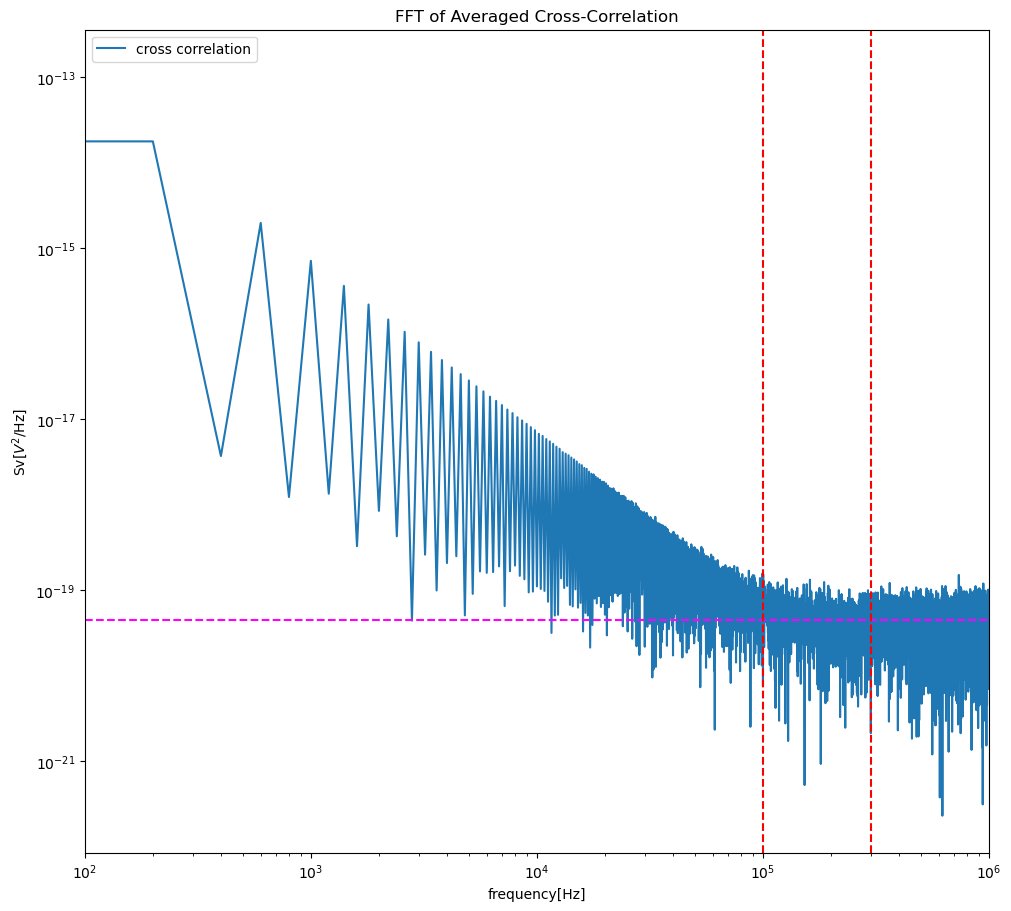

In [15]:

for i in range(numAcquisitions):
    #sleep(1)
    nMaxSamples = ctypes.c_int32(0)
    status["setMemorySegments"] = ps.ps4000MemorySegments(chandle, 10, ctypes.byref(nMaxSamples))
    assert_pico_ok(status["setMemorySegments"])

    # Set number of captures
    # handle = chandle
    # nCaptures = 10
    status["SetNoOfCaptures"] = ps.ps4000SetNoOfCaptures(chandle, 10)
    assert_pico_ok(status["SetNoOfCaptures"])
    # set up buffers

    bufferA0 = (ctypes.c_int16 * maxSamples)()
    bufferA1 = (ctypes.c_int16 * maxSamples)()
    bufferA2 = (ctypes.c_int16 * maxSamples)()
    bufferA3 = (ctypes.c_int16 * maxSamples)()
    bufferA4 = (ctypes.c_int16 * maxSamples)()
    bufferA5 = (ctypes.c_int16 * maxSamples)()
    bufferA6 = (ctypes.c_int16 * maxSamples)()
    bufferA7 = (ctypes.c_int16 * maxSamples)()
    bufferA8 = (ctypes.c_int16 * maxSamples)()
    bufferA9 = (ctypes.c_int16 * maxSamples)()



    bufferB0 = (ctypes.c_int16 * maxSamples)()
    bufferB1 = (ctypes.c_int16 * maxSamples)()
    bufferB2 = (ctypes.c_int16 * maxSamples)()
    bufferB3 = (ctypes.c_int16 * maxSamples)()
    bufferB4 = (ctypes.c_int16 * maxSamples)()
    bufferB5 = (ctypes.c_int16 * maxSamples)()
    bufferB6 = (ctypes.c_int16 * maxSamples)()
    bufferB7 = (ctypes.c_int16 * maxSamples)()
    bufferB8 = (ctypes.c_int16 * maxSamples)()
    bufferB9 = (ctypes.c_int16 * maxSamples)()

    


    # set data buffers
    # handle = chandle
    # channel = PS4000A_CHANNEL_A = 0
    # buffer = bufferAX (where X = segmentIndex)
    # bufferLength = maxSamples
    # segmentIndex = X
    # mode = PS4000A_RATIO_MODE_NONE = 0

    status["setDataBufferA0"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA0), maxSamples)
    status["setDataBufferA1"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA1), maxSamples)
    status["setDataBufferA2"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA2), maxSamples)
    status["setDataBufferA3"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA3), maxSamples)
    status["setDataBufferA4"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA4), maxSamples)
    status["setDataBufferA5"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA5), maxSamples)
    status["setDataBufferA6"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA6), maxSamples)
    status["setDataBufferA7"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA7), maxSamples)
    status["setDataBufferA8"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA8), maxSamples)
    status["setDataBufferA9"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferA9), maxSamples)

    status["setDataBufferB0"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB0), maxSamples)
    status["setDataBufferB1"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB1), maxSamples)
    status["setDataBufferB2"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB2), maxSamples)
    status["setDataBufferB3"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB3), maxSamples)
    status["setDataBufferB4"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB4), maxSamples)
    status["setDataBufferB5"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB5), maxSamples)
    status["setDataBufferB6"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB6), maxSamples)
    status["setDataBufferB7"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB7), maxSamples)
    status["setDataBufferB8"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB8), maxSamples)
    status["setDataBufferB9"] = ps.ps4000SetDataBuffer(chandle, 0, ctypes.byref(bufferB9), maxSamples)

    

    # run block capture
    # handle = chandle
    # number of pre-trigger samples = preTriggerSamples
    # number of post-trigger samples = PostTriggerSamples
    # timebase = 3 = 80 ns = timebase (see Programmer's guide for mre information on timebases)
    # time indisposed ms = None (not needed in the example)
    # segment index = 0
    # lpReady = None (using ps4000aIsReady rather than ps4000aBlockReady)
    #pParameter = None
    status["runBlock"] = ps.ps4000RunBlock(chandle, preTriggerSamples, postTriggerSamples, timebase, oversample, None, 0, None, False)
    assert_pico_ok(status["runBlock"])

    # check for end of capture
    ready = ctypes.c_int16(0)
    check = ctypes.c_int16(0)
    while ready.value == check.value:
        status["isReady"] = ps.ps4000IsReady(chandle, ctypes.byref(ready))

    # Creates a overlow location for data
    overflow = (ctypes.c_int16 * 10)()
    # Creates converted types maxsamples
    cmaxSamples=ctypes.c_int32(np.int32(maxSamples))
    cmaxSamples_Time = ctypes.c_int32(np.int32(maxSamples/n_Bin)) ### adjusting time axis for n_Bin bins

    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA0,maxSamples,0)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA1,maxSamples,1)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA2,maxSamples,2)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA3,maxSamples,3)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA4,maxSamples,4)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA5,maxSamples,5)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA6,maxSamples,6)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA7,maxSamples,7)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA8,maxSamples,8)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,0,bufferA9,maxSamples,9)

    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB0,maxSamples,0)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB1,maxSamples,1)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB2,maxSamples,2)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB3,maxSamples,3)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB4,maxSamples,4)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB5,maxSamples,5)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB6,maxSamples,6)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB7,maxSamples,7)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB8,maxSamples,8)
    status["setDataBufferBulk"] = ps.ps4000SetDataBufferBulk(chandle,1,bufferB9,maxSamples,9)


    # collect data 
    # handle = chandle
    # noOfSamples = cmaxSamples
    # fromSegmentIndex = 0
    # toSegmentIndex = 9
    # downSampleRatio = 1
    # downSampleRatioMode = PS4000A_RATIO_MODE_NONE
    status["getValuesBulk"] = ps.ps4000GetValuesBulk(chandle, ctypes.byref(cmaxSamples), 0, 9, ctypes.byref(overflow))
    assert_pico_ok(status["getValuesBulk"])

    # find maximum ADC count value
    # handle = chandle
    # pointer to value = ctypes.byref(maxADC)
    maxADC = ctypes.c_int16(32767)

    # convert from adc to mV
    adc2mVChA0 =  adc2mV(bufferA0, chARange, maxADC)
    adc2mVChA1 =  adc2mV(bufferA1, chARange, maxADC)
    adc2mVChA2 =  adc2mV(bufferA2, chARange, maxADC)
    adc2mVChA3 =  adc2mV(bufferA3, chARange, maxADC)
    adc2mVChA4 =  adc2mV(bufferA4, chARange, maxADC)
    adc2mVChA5 =  adc2mV(bufferA5, chARange, maxADC)
    adc2mVChA6 =  adc2mV(bufferA6, chARange, maxADC)
    adc2mVChA7 =  adc2mV(bufferA7, chARange, maxADC)
    adc2mVChA8 =  adc2mV(bufferA8, chARange, maxADC)
    adc2mVChA9 =  adc2mV(bufferA9, chARange, maxADC)

    adc2mVChB0 =  adc2mV(bufferB0, chARange, maxADC)
    adc2mVChB1 =  adc2mV(bufferB1, chARange, maxADC)
    adc2mVChB2 =  adc2mV(bufferB2, chARange, maxADC)
    adc2mVChB3 =  adc2mV(bufferB3, chARange, maxADC)
    adc2mVChB4 =  adc2mV(bufferB4, chARange, maxADC)
    adc2mVChB5 =  adc2mV(bufferB5, chARange, maxADC)
    adc2mVChB6 =  adc2mV(bufferB6, chARange, maxADC)
    adc2mVChB7 =  adc2mV(bufferB7, chARange, maxADC)
    adc2mVChB8 =  adc2mV(bufferB8, chARange, maxADC)
    adc2mVChB9 =  adc2mV(bufferB9, chARange, maxADC)

    #print(len(adc2mVChA0))

    # Perform cross-correlation on this iteration (factor of 1e6 is for mV to V conversion for two channels)

    A0=np.split(np.array(adc2mVChA0),n_Bin,0)
    B0=np.split(np.array(adc2mVChB0),n_Bin,0)
    #print(A0[0])
    cross_0=np.array([])
    for j in range(0,n_Bin):
        c0=correlate(A0[j],B0[j], mode='same', method='fft') / (len(B0[j])*1e6)
        if j==0:
            cross_0=c0
        else:
            cross_0=cross_0+c0
    cross_0=cross_0/n_Bin

    A1=np.split(np.array(adc2mVChA1),n_Bin,0)
    B1=np.split(np.array(adc2mVChB1),n_Bin,0)

    cross_1=np.array([])
    for j in range(0,n_Bin):
        c1=correlate(A1[j],B1[j], mode='same', method='fft') / (len(B1[j])*1e6)
        if j==0:
            cross_1=c1
        else:
            cross_1=cross_1+c1
    cross_1=cross_1/n_Bin

    A2=np.split(np.array(adc2mVChA2),n_Bin,0)
    B2=np.split(np.array(adc2mVChB2),n_Bin,0)

    cross_2=np.array([])
    for j in range(0,n_Bin):
        c2=correlate(A2[j],B2[j], mode='same', method='fft') / (len(B2[j])*1e6)
        if j==0:
            cross_2=c2
        else:
            cross_2=cross_2+c2
    cross_2=cross_2/n_Bin

    A3=np.split(np.array(adc2mVChA3),n_Bin,0)
    B3=np.split(np.array(adc2mVChB3),n_Bin,0)

    cross_3=np.array([])
    for j in range(0,n_Bin):
        c3=correlate(A3[j],B3[j], mode='same', method='fft') / (len(B3[j])*1e6)
        if j==0:
            cross_3=c3
        else:
            cross_3=cross_3+c3
    cross_3=cross_3/n_Bin

    A4=np.split(np.array(adc2mVChA4),n_Bin,0)
    B4=np.split(np.array(adc2mVChB4),n_Bin,0)

    cross_4=np.array([])
    for j in range(0,n_Bin):
        c4=correlate(A4[j],B4[j], mode='same', method='fft') / (len(B4[j])*1e6)
        if j==0:
            cross_4=c4
        else:
            cross_4=cross_4+c4
    cross_4=cross_4/n_Bin

    A5=np.split(np.array(adc2mVChA5),n_Bin,0)
    B5=np.split(np.array(adc2mVChB5),n_Bin,0)

    cross_5=np.array([])
    for j in range(0,n_Bin):
        c5=correlate(A5[j],B5[j], mode='same', method='fft') / (len(B5[j])*1e6)
        if j==0:
            cross_5=c5
        else:
            cross_5=cross_5+c5
    cross_5=cross_5/n_Bin

    A6=np.split(np.array(adc2mVChA6),n_Bin,0)
    B6=np.split(np.array(adc2mVChB6),n_Bin,0)

    cross_6=np.array([])
    for j in range(0,n_Bin):
        c6=correlate(A6[j],B6[j], mode='same', method='fft') / (len(B6[j])*1e6)
        if j==0:
            cross_6=c6
        else:
            cross_6=cross_6+c6
    cross_6=cross_6/n_Bin

    A7=np.split(np.array(adc2mVChA7),n_Bin,0)
    B7=np.split(np.array(adc2mVChB7),n_Bin,0)

    cross_7=np.array([])
    for j in range(0,n_Bin):
        c7=correlate(A7[j],B7[j], mode='same', method='fft') / (len(B7[j])*1e6)
        if j==0:
            cross_7=c7
        else:
            cross_7=cross_7+c7
    cross_7=cross_7/n_Bin

    A8=np.split(np.array(adc2mVChA8),n_Bin,0)
    B8=np.split(np.array(adc2mVChB8),n_Bin,0)

    cross_8=np.array([])
    for j in range(0,n_Bin):
        c8=correlate(A8[j],B8[j], mode='same', method='fft') / (len(B8[j])*1e6)
        if j==0:
            cross_8=c8
        else:
            cross_8=cross_8+c8
    cross_8=cross_8/n_Bin

    A9=np.split(np.array(adc2mVChA9),n_Bin,0)
    B9=np.split(np.array(adc2mVChB9),n_Bin,0)

    cross_9=np.array([])
    for j in range(0,n_Bin):
        c9=correlate(A9[j],B9[j], mode='same', method='fft') / (len(B9[j])*1e6)
        if j==0:
            cross_9=c9
        else:
            cross_9=cross_9+c9
    cross_9=cross_9/n_Bin

    cross_corr_avg= (cross_0+cross_1+cross_2+cross_3+cross_4+cross_5+cross_6+cross_7+cross_8+cross_9)/10
    

    # If this is the first acquisition, initialize the average list
    if i==0:
        average_cross_corr = cross_corr_avg
    else:
        # Update the average cross-correlation
        average_cross_corr = [(x + y) for x, y in zip(average_cross_corr, cross_corr_avg)]

    print("Acquisition number:", i + 1)
    #print(np.(average_cross_corr))

# Final average cross-correlation is now in average_cross_corr

# Create time data
time = np.linspace(0, ((cmaxSamples_Time.value) - 1) * timeIntervalns.value/1e9, cmaxSamples_Time.value) #Changes time to seconds instead of nanoseconds
T = (time.max()-time.min()) # seconds
N = np.size(time)
fs = int(N/T) # Hz
dt = 1/fs
fwelch = fftfreq(N,dt)
fwelch = fwelch[:fwelch.size//2]




############Calculate the FFT of the averaged cross-correlation############
Sv_corr = np.absolute(fftshift(fft(average_cross_corr)))
Sv_corr=2*Sv_corr[Sv_corr.size//2:]
Sv_corr=Sv_corr/fs
Sv_corr=Sv_corr/(g*g*numAcquisitions) 

#############print the PSD between two frequency set points##########
f_lo = 100_000 # Hz
f_hi = 300_000 # Hz
label = "PSD"
print(f"{label} = {np.mean(Sv_corr[np.where((fwelch>f_lo) & (fwelch<f_hi))])} between {f_lo} and {f_hi} Hz")

############Saving the PSD data in a file###############
np.savetxt('test_short_gain_5e4_1000avg_2Ms_10Ksa_XF_RBM_bin10.hdf5', [(x,y) for x,y in zip(fwelch,Sv_corr)], delimiter=',')

########## Plotting the PSD vs frequency######
fig, ax = plt.subplots(figsize=(10,9), constrained_layout=True)
ax.plot(fwelch, Sv_corr, alpha=1, label = "cross correlation")
ax.axhline(np.mean(Sv_corr[np.where((fwelch>f_lo) & (fwelch<f_hi))]), color='magenta', linestyle='--')
ax.set_xlabel("frequency[Hz]")
ax.set_ylabel("Sv[$V^2$/Hz]")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e2,1e6)
# ax.set_ylim(1e-21,1e-15)
ax.axvline(f_hi, color='r', linestyle='--')
ax.axvline(f_lo, color='r', linestyle='--')
plt.title("FFT of Averaged Cross-Correlation")
ax.legend()
plt.show()

# Stop the scope
# handle = chandle
status["stop"] = ps.ps4000Stop(chandle)
assert_pico_ok(status["stop"])


#Close unit Disconnect the scope
#handle = chandle
status["close"] = ps.ps4000CloseUnit(chandle)
assert_pico_ok(status["close"])


# Close the Picoscope

In [16]:
# Close unit Disconnect the scope
# handle = chandle
status["close"] = ps.ps4000CloseUnit(chandle)
assert_pico_ok(status["close"])


PicoSDKCtypesError: PicoSDK returned 'PICO_INVALID_HANDLE'